<h1>Boston Housing Price Prediction Using Neural Networks</h1>

<p>
    This project implements a neural network model to predict housing prices in Boston using the Boston Housing dataset. 
    The model utilizes TensorFlow and Keras to build a multi-layered neural network capable of capturing complex relationships 
    between various features of the houses and their corresponding prices.
</p>

<h2>Overview</h2>
<p>
    The key components of this implementation include:
</p>
<ul>
    <li><strong>Data Loading</strong>: The Boston Housing dataset is loaded using TensorFlow's built-in dataset.</li>
    <li><strong>Data Normalization</strong>: Input features are normalized to improve model performance.</li>
    <li><strong>Neural Network Architecture</strong>: A sequential model with multiple dense layers is defined, using ReLU activation functions.</li>
    <li><strong>Model Training</strong>: The model is trained using mean absolute error as the loss function.</li>
    <li><strong>Predictions</strong>: The model can make predictions on new data after training.</li>
</ul>

<p>
    Made by <strong>Rafael H. Bernardi</strong>.
    You can find more in my
    <a href="https://github.com/RafaelHBernardi" target="_blank">GitHub</a>.
</p>


In [137]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

In [138]:
print(tf.__version__) # 2.17.0
print(np.__version__) # 1.26.4
# If you don't have these specific versions the code may not work correctly
# *pip install -r requirements.txt

2.17.0
1.26.4


In [139]:
# Importando os dados
(dados_treino, rotulos_treino),(dados_teste, rotulos_teste) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2,seed=42)

In [140]:
# Retirando 1% dos dados para predição depois

num_amostras = int(0.01 * len(dados_treino))
indices = np.random.permutation(len(dados_treino))

indices_previsao = indices[:num_amostras]
dados_previsao = dados_treino[indices_previsao]
rotulos_previsao = rotulos_treino[indices_previsao]

# removendo do conjunto original
dados_treino = np.delete(dados_treino, indices_previsao, axis=0)
rotulos_treino = np.delete(rotulos_treino, indices_previsao, axis=0)

In [141]:
print(f"Dados Treino: {dados_treino.shape}")
print(f"Rotulos Treino: {rotulos_treino.shape}")
print(f"Dados Teste: {dados_teste.shape}")
print(f"Rotulos Treino: {rotulos_teste.shape}")

Dados Treino: (400, 13)
Rotulos Treino: (400,)
Dados Teste: (102, 13)
Rotulos Treino: (102,)


<h2>Normalizando</h2>

In [143]:
normal = tf.keras.layers.Normalization()
normal.adapt(np.array(dados_treino))


<h2>Model</h2>

In [145]:
model = keras.Sequential([
    normal,
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

In [146]:
perda = keras.losses.MeanAbsoluteError() # ou o mse loss='mse'
otimizador = keras.optimizers.Adam(learning_rate=0.01) # ou o 'rmsprop'
model.compile(loss=perda,optimizer=otimizador,metrics=['mae'])

In [147]:
history = model.fit(
    dados_treino, rotulos_treino,
    epochs = 100,
    verbose = 1,
    validation_split = 0.2
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 19.9131 - mae: 19.9131 - val_loss: 9.2054 - val_mae: 9.2054
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7829 - mae: 7.7829 - val_loss: 4.4101 - val_mae: 4.4101
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9639 - mae: 4.9639 - val_loss: 3.4149 - val_mae: 3.4149
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9417 - mae: 3.9417 - val_loss: 3.1488 - val_mae: 3.1488
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0420 - mae: 3.0420 - val_loss: 2.7190 - val_mae: 2.7190
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5146 - mae: 2.5146 - val_loss: 2.7100 - val_mae: 2.7100
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5261 - mae: 2.5261 - val_loss: 2.8232 - val_mae: 2.8232
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4263 - mae: 2.4263 - val_loss: 2.7165 - val_mae: 2.7165
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.

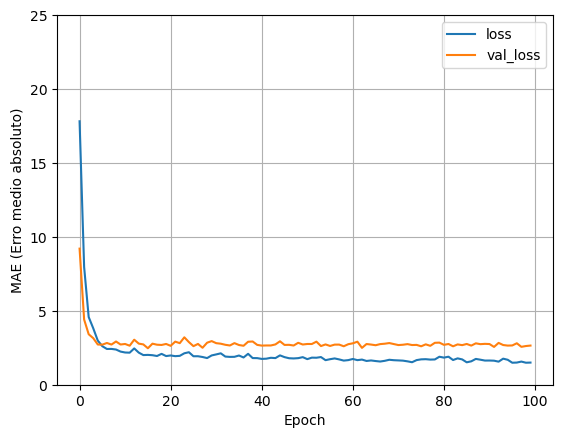

In [148]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 25])
    plt.xlabel('Epoch')
    plt.ylabel('MAE (Erro medio absoluto)')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [149]:
model.evaluate(
    dados_teste,
    rotulos_teste, verbose=1) 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1550 - mae: 2.1550 


[2.2642674446105957, 2.2642674446105957]

<h2>Making Predictions</h2>

In [151]:
previsao = model.predict(dados_previsao) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


In [152]:
for i in range(len(dados_previsao)):
    print(f"Previsão: {previsao[i][0]:.2f}, Real: {rotulos_previsao[i]:.2f}")

# Teria sido melhor normalizar os dados de entrada ( dados_para_previsao ) e também os rotulos_previsão mas... 

Previsão: 23.33, Real: 22.10
Previsão: 22.35, Real: 23.10
Previsão: 13.67, Real: 17.20
Previsão: 22.66, Real: 21.70
